<a href="https://colab.research.google.com/github/kimjaehwankimjaehwan/Just-for-fun/blob/main/decisionmodel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [ ]:
## 의사결정 모형
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/KOREAIT/adult.csv')
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       48842 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education_num   48842 non-null  int64 
 5   marital_status  48842 non-null  object
 6   occupation      48842 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital_gain    48842 non-null  int64 
 11  capital_loss    48842 non-null  int64 
 12  hours_per_week  48842 non-null  int64 
 13  native_country  48842 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [ ]:
df.isnull().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
education_num,0
marital_status,0
occupation,0
relationship,0
race,0
sex,0


In [ ]:
df.describe(include='all')

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
count,48842.000000,48842,4.884200e+04,48842,48842.000000,48842,48842,48842,48842,48842,48842.000000,48842.000000,48842.000000,48842,48842
unique,NaN,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,42,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,33906,NaN,15784,NaN,22379,6172,19716,41762,32650,NaN,NaN,NaN,43832,37155
mean,38.643585,NaN,1.896641e+05,NaN,10.078089,NaN,NaN,NaN,NaN,NaN,1079.067626,87.502314,40.422382,NaN,NaN
std,13.710510,NaN,1.056040e+05,NaN,2.570973,NaN,NaN,NaN,NaN,NaN,7452.019058,403.004552,12.391444,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.175505e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.781445e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.376420e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


In [ ]:
## df 데이터에서 각 열마다 데이터값이 '?' 인 것이 있는지 확인
df.isin(['?']).sum()



,0
age,0
workclass,2799
fnlwgt,0
education,0
education_num,0
marital_status,0
occupation,2809
relationship,0
race,0
sex,0


In [ ]:

## 데이터 값이 '?'을 포함하는 행을 표시
df[df.isin(['?']).any(axis=1)]

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K
13,58,?,299831,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,0,0,35,United-States,<=50K
19,40,Private,85019,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,45,?,>50K
22,72,?,132015,7th-8th,4,Divorced,?,Not-in-family,White,Female,0,0,6,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48811,35,?,320084,Bachelors,13,Married-civ-spouse,?,Wife,White,Female,0,0,55,United-States,>50K
48812,30,?,33811,Bachelors,13,Never-married,?,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K
48820,71,?,287372,Doctorate,16,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,>50K
48822,41,?,202822,HS-grad,9,Separated,?,Not-in-family,Black,Female,0,0,32,United-States,<=50K


In [ ]:

len(df[df.isin(['?']).any(axis=1)])

3620

In [ ]:
## 데이터에서 '?' 값 제거하기
df = df[~df.isin(['?']).any(axis=1)]  ### axis=1 은 하나의 행의 각 열들에 대해 적용 ## 전체 코드는 각 행들에 대해 '?'값이 포함되어있는 것들만 선택  ## ~ : 부정

In [ ]:
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [ ]:
def p(str):
    print(str, '\n')

In [ ]:
df.info()
p(df)
p(df['education'].unique())
p(df['income'])

# 데이터 전처리

# 연소득이 5만달러 초과하면 high, 그렇지 않으면 low
df['income'] = np.where(df['income']=='>50K', 'high', 'low')
p(df['income'].value_counts(normalize=True)) # 범주의 비율 normalize

# 타겟변수(=종속변수) 예측에 도움이 안되는 불필요한 변수 제거
df = df.drop(columns='fnlwgt')


# 원핫인코딩(one-hot encoding) 을 이용한 문자타입변수를 숫자타입으로 변환
# 원핫인코딩 : 데이터를 모두 1이나 0으로 표시

target = df['income']
df = df.drop(columns= 'income') # 종속변수 제거
df = pd.get_dummies(df) # 원핫인코딩
df['income'] = target


<class 'pandas.core.frame.DataFrame'>
Index: 45222 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             45222 non-null  int64 
 1   workclass       45222 non-null  object
 2   fnlwgt          45222 non-null  int64 
 3   education       45222 non-null  object
 4   education_num   45222 non-null  int64 
 5   marital_status  45222 non-null  object
 6   occupation      45222 non-null  object
 7   relationship    45222 non-null  object
 8   race            45222 non-null  object
 9   sex             45222 non-null  object
 10  capital_gain    45222 non-null  int64 
 11  capital_loss    45222 non-null  int64 
 12  hours_per_week  45222 non-null  int64 
 13  native_country  45222 non-null  object
 14  income          45222 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.5+ MB
       age     workclass  fnlwgt     education  education_num  \
0       25       Private  226802 

In [ ]:
# df 파일을 엑셀 파일로 저장
df.to_excel('adult_preprocessed.xlsx', index=False)

In [ ]:

# scikit-learn을 이용하여 트레이닝 세트와 테스트 세트 분리
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df,
                                     test_size=0.3,             # 테스트 세트 비율
                                     stratify=df["income"],     # 범주별 비율을 통일할 변수
                                     random_state=1234)         # 난수 초기값
p(df_train.shape)   # 트레이닝 세트의 행 개수, 변수 개수
p(df_test.shape)    # 테스트 세트의 행 개수, 변수 개수

# # 트레이닝 세트와 테스트 세트의 범주별 비율
# p(df_train["income"].value_counts(normalize=True))
# p(df_test["income"].value_counts(normalize=True))

(31655, 104) 

(13567, 104) 



In [ ]:
## 의사결정나무 모델 생성
from sklearn import tree

## 의사결정나무분류기 생성
## random_state 시드값, max_depth는 트리의 깊이
clf = tree.DecisionTreeClassifier(random_state=42, max_depth=3)

# 예측변수, 타겟변수 추출
train_x = df_train.drop(columns = 'income') # 예측변수 (전체 15개 변수 중 타겟변수를 제외)
train_y = df_train['income'] # 타켓변수 (예측변수를 통해서 예측하고자 하는 변수)

# 의사결정나무 모델 생성
# fit(X = 예측변수,  y= 타겟변수)
model = clf.fit(X=train_x, y=train_y)




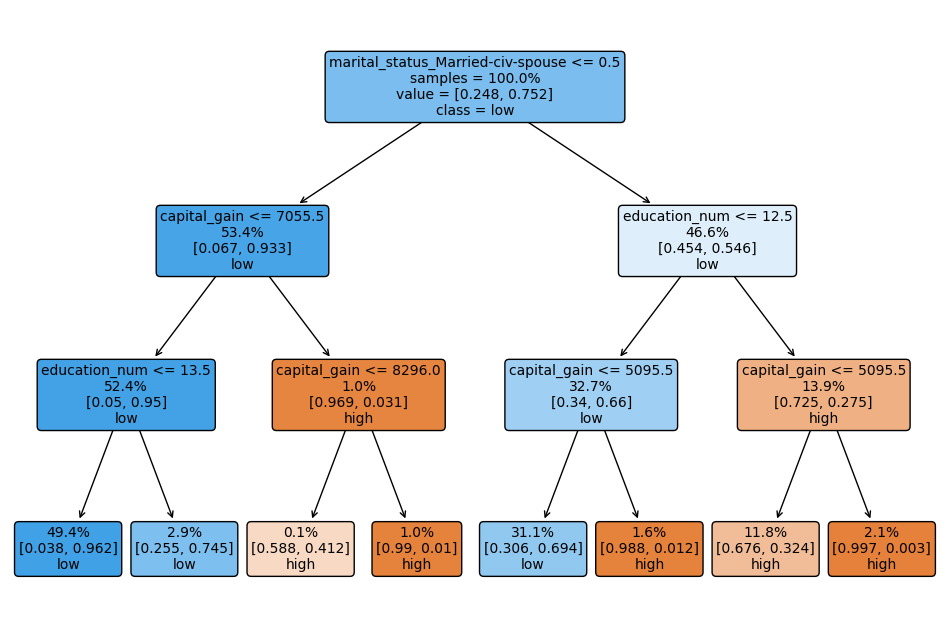

In [ ]:
# 모델 시각화
import matplotlib.pyplot as plt
plt.rcParams.update(
    {
        'figure.dpi' : '100', # 그래프 해상도
        'figure.figsize' : [12,8] # 그래프 크기
    }
)

# 트리그래프
tree.plot_tree(
    model, # 모델
    feature_names= train_x.columns, ##예측변수의 명칭들
    class_names= ['high', 'low'], # 타켓변수의 클래스(알파벳순)
    proportion = True, # 비율 표시여부
    filled = True , # 채움여부
    rounded = True, # 노드테두리 둘글게 할지 여부
    impurity = False, # 불순도 표시 여부
    label = 'root' , # 제목 표시위치
    fontsize = 10 # 글자크기
)
plt.show()

In [ ]:
# 예측을 위한 예측 변수, 타겟변수 추출
test_x = df_test.drop(columns = 'income') # 예측변수
p(df_test)
test_y = df_test['income']


# 모델을 통한 예측

df_test['pred'] = model.predict(test_x)
p(df_test)

       age  education_num  capital_gain  capital_loss  hours_per_week  \
29365   25              2             0             0              40   
27415   32              1          4508             0              40   
29711   49              8             0             0              35   
41024   48             10             0             0              40   
44766   30              9             0             0              50   
...    ...            ...           ...           ...             ...   
24652   43             10             0             0              40   
30176   37              9             0          1848              48   
19054   31              9             0             0              40   
8117    35              9             0             0              50   
33347   23              9             0             0              50   

       workclass_Federal-gov  workclass_Local-gov  workclass_Private  \
29365                  False                False  

In [ ]:
## 예측 성능 평가

# 컨퓨젼 매트릭스 라이브러리
from sklearn.metrics import confusion_matrix

# 컨퓨전 매트릭스 생성
conf_mat = confusion_matrix(
    y_true= df_test['income'], # 실제값
    y_pred= df_test['pred'], # 예측값
    labels = ['high', 'low'] # 레이블(클래스 배치순서, 문자 오름차순)
)
p(conf_mat)

[[1705 1657]
 [ 511 9694]] 



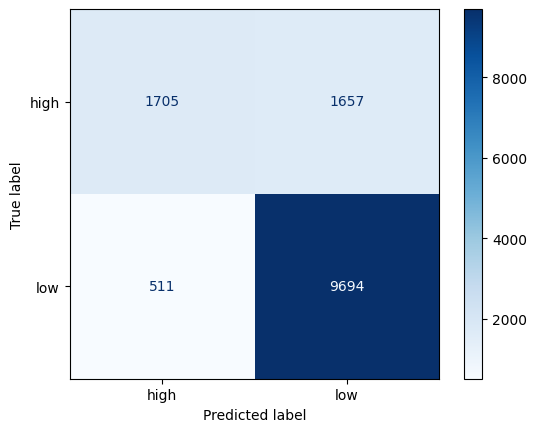

In [ ]:
# 그래프 설정 되돌리기
plt.rcdefaults() # 그래프 설정 초기화

# 라이브러리
from sklearn.metrics import ConfusionMatrixDisplay

p = ConfusionMatrixDisplay(
    confusion_matrix = conf_mat, # 매트릭스 데이터
    display_labels = ('high', 'low'), # 타겟변수 클래스명
)
p.plot(cmap = 'Blues') # 컬러맵
plt.show()

In [ ]:
pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
balance_scale = fetch_ucirepo(id=12)

# data (as pandas dataframes)
X = balance_scale.data.features
y = balance_scale.data.targets

# metadata
print(balance_scale.metadata)

# variable information
print(balance_scale.variables)


{'uci_id': 12, 'name': 'Balance Scale', 'repository_url': 'https://archive.ics.uci.edu/dataset/12/balance+scale', 'data_url': 'https://archive.ics.uci.edu/static/public/12/data.csv', 'abstract': 'Balance scale weight & distance database', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 625, 'num_features': 4, 'feature_types': ['Categorical'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1976, 'last_updated': 'Fri Feb 09 2024', 'dataset_doi': '10.24432/C5488X', 'creators': ['R. Siegler'], 'intro_paper': None, 'additional_info': {'summary': 'This data set was generated to model psychological experimental results.  Each example is classified as having the balance scale tip to the right, tip to the left, or be balanced.  The attributes are the left weight, the left distance, the right weight, and the right distance.  The corr

In [ ]:
X.head()

,right-distance,right-weight,left-distance,left-weight
0,1,1,1,1
1,2,1,1,1
2,3,1,1,1
3,4,1,1,1
4,5,1,1,1


In [ ]:
y.head()

,class
0,B
1,R
2,R
3,R
4,R


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625 entries, 0 to 624
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   right-distance  625 non-null    int64
 1   right-weight    625 non-null    int64
 2   left-distance   625 non-null    int64
 3   left-weight     625 non-null    int64
dtypes: int64(4)
memory usage: 19.7 KB


In [ ]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625 entries, 0 to 624
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   class   625 non-null    object
dtypes: object(1)
memory usage: 5.0+ KB


In [ ]:
for i in range(len(X.columns)):
  X.iloc[:,i].value_counts()
  print(X.iloc[:,i].value_counts())

right-distance
1    125
2    125
3    125
4    125
5    125
Name: count, dtype: int64
right-weight
1    125
2    125
3    125
4    125
5    125
Name: count, dtype: int64
left-distance
1    125
2    125
3    125
4    125
5    125
Name: count, dtype: int64
left-weight
1    125
2    125
3    125
4    125
5    125
Name: count, dtype: int64


In [ ]:
y.value_counts()

,count
class,
L,288
R,288
B,49


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state= 100)


In [ ]:
clf_gini = DecisionTreeClassifier(
    criterion= 'gini', # 분류기의 종류(분류 알고리즘)
    random_state= 100, # 랜덤시드
    max_depth=3, # 트리 뎁스
    min_samples_leaf=5 # leaf 노드 최소 갯수
)
clf_gini.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=100)

In [ ]:
y_train.value_counts()

,count
class,
L,203
R,198
B,36


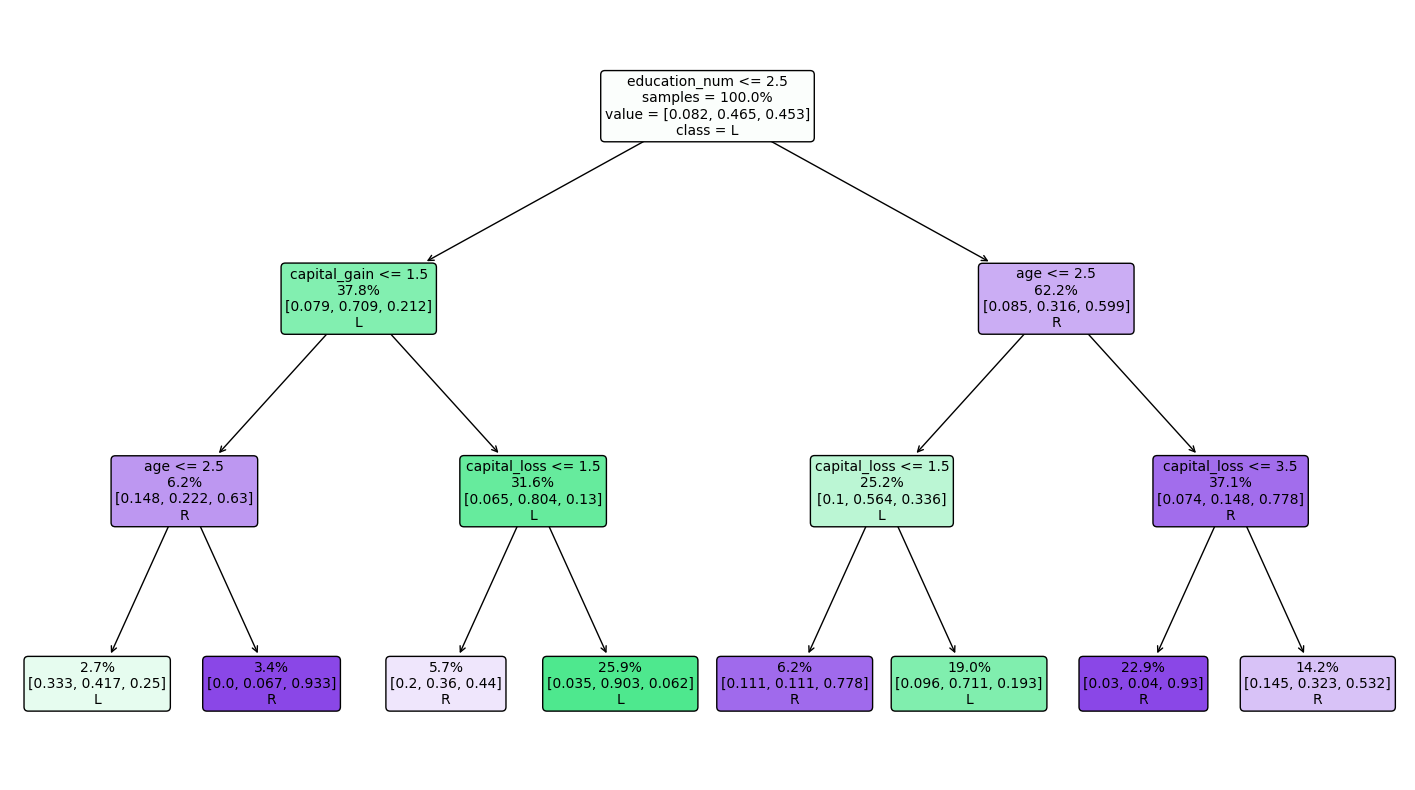

In [ ]:
# 모델 시각화
import matplotlib.pyplot as plt
plt.rcParams.update(
    {
        'figure.dpi' : '100', # 그래프 해상도
        'figure.figsize' : [18,10] # 그래프 크기
    }
)

# 트리그래프
tree.plot_tree(
    clf_gini, # 모델
    feature_names= train_x.columns, ##예측변수의 명칭들
    class_names= ['B', 'L', 'R'], # 타켓변수의 클래스(알파벳순)
    proportion = True, # 비율 표시여부
    filled = True , # 채움여부
    rounded = True, # 노드테두리 둘글게 할지 여부
    impurity = False, # 불순도 표시 여부
    label = 'root' , # 제목 표시위치
    fontsize = 10 # 글자크기
)
plt.show()

In [ ]:
y_pred = clf_gini.predict(X_test)



In [ ]:
from sklearn.metrics import confusion_matrix

# 컨퓨전 매트릭스 생성
conf_mat = confusion_matrix(
    y_true= y_test, # 실제값
    y_pred= y_pred, # 예측값
    labels = ['B', 'L', 'R'] # 레이블(클래스 배치순서, 문자 오름차순)
)
print("컨퓨젼 매트릭스 : ", confusion_matrix(y_test, y_pred))

# 그래프 설정 되돌리기


컨퓨젼 매트릭스 :  [[ 0  6  7]
 [ 0 67 18]
 [ 0 19 71]]


In [ ]:
import sklearn.metrics as metrics
# Accuracy : 정확도
acc = metrics.accuracy_score(
    y_true= y_test, # 실제값
    y_pred= y_pred, # 예측값
)
print(f'Accuracy : {acc}')

# Precision : 정밀도
pre = metrics.precision_score(
    y_true= y_test, # 실제값
    y_pred= y_pred, # 예측값
    average='macro'  # 관심클래스
)
print(f'Precision : {pre}')

# Recall : 재현율
rec = metrics.recall_score(
    y_true= y_test, # 실제값
    y_pred= y_pred, # 예측값
    average='macro'  # 관심클래스
)
print(f'Recall : {rec}')

# F1 Score
f1 = metrics.f1_score(
    y_true= y_test, # 실제값
    y_pred= y_pred, # 예측값
    average='macro'  # 관심클래스
)
print(f'F1 Score : {f1}')

Accuracy : 0.7340425531914894
Precision : 0.4892814009661836
Recall : 0.5257080610021786
F1 Score : 0.5068343357025697


In [ ]:

# print("정확도 :", accuracy_score(y_test, y_pred)*100)
print("레포트 :", classification_report(y_test, y_pred))

레포트 :               precision    recall  f1-score   support

           B       0.00      0.00      0.00        13
           L       0.73      0.79      0.76        85
           R       0.74      0.79      0.76        90

    accuracy                           0.73       188
   macro avg       0.49      0.53      0.51       188
weighted avg       0.68      0.73      0.71       188

